In [6]:
"""2-input xor example.
"""
import os
import neat
import visualize

xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]

print('xor_inputs', xor_inputs)
print('xor_outputs', xor_outputs)

xor_inputs [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs [(0.0,), (1.0,), (1.0,), (0.0,)]


In [15]:
print(os.getcwd)

C:\Users\YuukiK\Documents\pyML\github\test\neat-python


In [22]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


local_dir = os.getcwd()
config_file = os.path.join(local_dir, 'config-feedforward')

config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                    neat.DefaultSpeciesSet, neat.DefaultStagnation,
                    config_file)
p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

winner = p.run(eval_genomes, 300)

print('----------------------------------------------------------------------------------------------------------')
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')



 ****** Running generation 0 ****** 

Population's average fitness: 2.27078 stdev: 0.38141
Best fitness: 2.99875 - size: (1, 2) - species 1 - id 35
Average adjusted fitness: 0.611
Mean genetic distance 1.330, standard deviation 0.436
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.611     0
Total extinctions: 0
Generation time: 0.017 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.31931 stdev: 0.36130
Best fitness: 2.99946 - size: (1, 2) - species 1 - id 223
Average adjusted fitness: 0.595
Mean genetic distance 1.386, standard deviation 0.502
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.595     0
Total extinctions: 0
Generation time: 0.017 sec (0.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.28711 stdev: 0

     1   21    46      3.0    0.568    12
     2   17   104      3.3    0.537     6
Total extinctions: 0
Generation time: 0.033 sec (0.034 average)

 ****** Running generation 22 ****** 

Population's average fitness: 2.35588 stdev: 0.34116
Best fitness: 3.30209 - size: (3, 6) - species 2 - id 2327
Average adjusted fitness: 0.270
Mean genetic distance 1.541, standard deviation 0.483
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   22    53      3.0    0.261    13
     2   18    97      3.3    0.279     7
Total extinctions: 0
Generation time: 0.030 sec (0.034 average)

 ****** Running generation 23 ****** 

Population's average fitness: 2.41302 stdev: 0.41034
Best fitness: 3.30209 - size: (3, 6) - species 2 - id 2327
Average adjusted fitness: 0.571
Mean genetic distance 1.583, standard deviation 0.513
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ===

In [25]:
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

for xi, xo in zip(xor_inputs, xor_outputs):
    output = winner_net.activate(xi)
    print('input {!r}, expected output {!r}, got {!r}'.format(xi, xo, output))


input (0.0, 0.0), expected output (0.0,), got [0.006459534063028205]
input (0.0, 1.0), expected output (1.0,), got [0.9722666919361371]
input (1.0, 0.0), expected output (1.0,), got [0.9261603225033262]
input (1.0, 1.0), expected output (0.0,), got [0.06095326810473908]


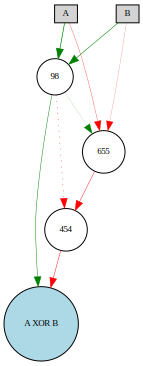

In [27]:
node_names = {-1: 'A', -2: 'B', 0: 'A XOR B'}
visualize.draw_net(config, winner, True, node_names=node_names)

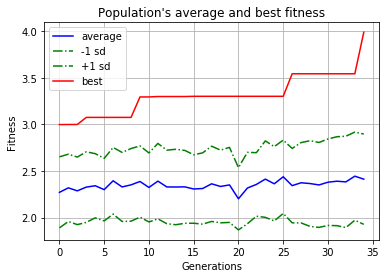

In [30]:
visualize.plot_stats(stats, ylog=False, view=True)

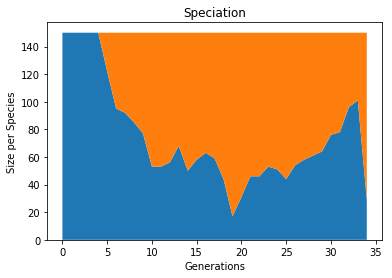

In [32]:
visualize.plot_species(stats, view=True)

In [33]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
p.run(eval_genomes, 10)

Mean genetic distance 2.057, standard deviation 0.636
Mean genetic distance 1.928, standard deviation 0.659
Mean genetic distance 1.767, standard deviation 0.651
Mean genetic distance 1.807, standard deviation 0.613
Mean genetic distance 1.721, standard deviation 0.604
Mean genetic distance 1.730, standard deviation 0.620
Mean genetic distance 1.792, standard deviation 0.659
Mean genetic distance 1.802, standard deviation 0.663
Mean genetic distance 1.921, standard deviation 0.692
Mean genetic distance 2.023, standard deviation 0.712
